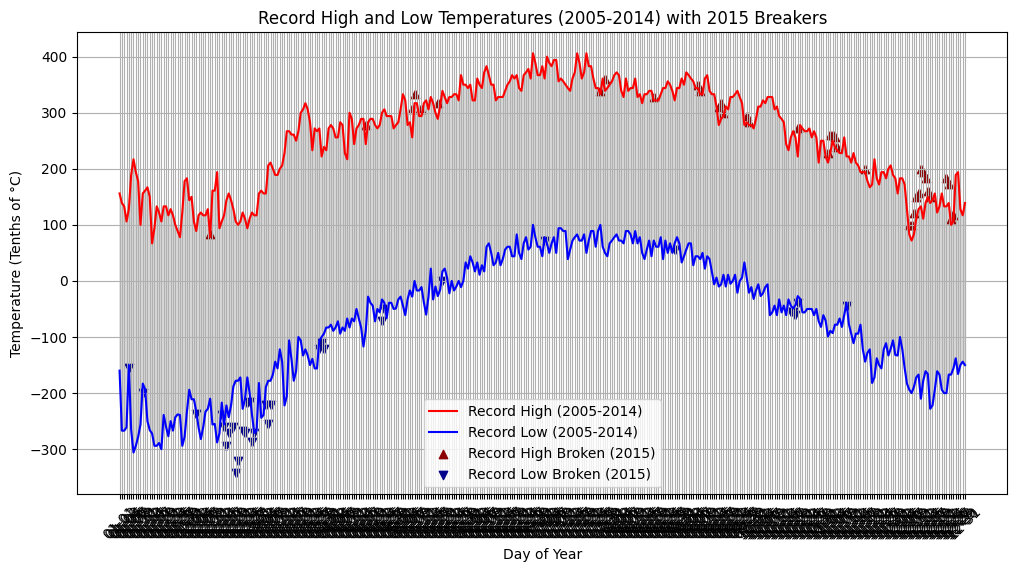

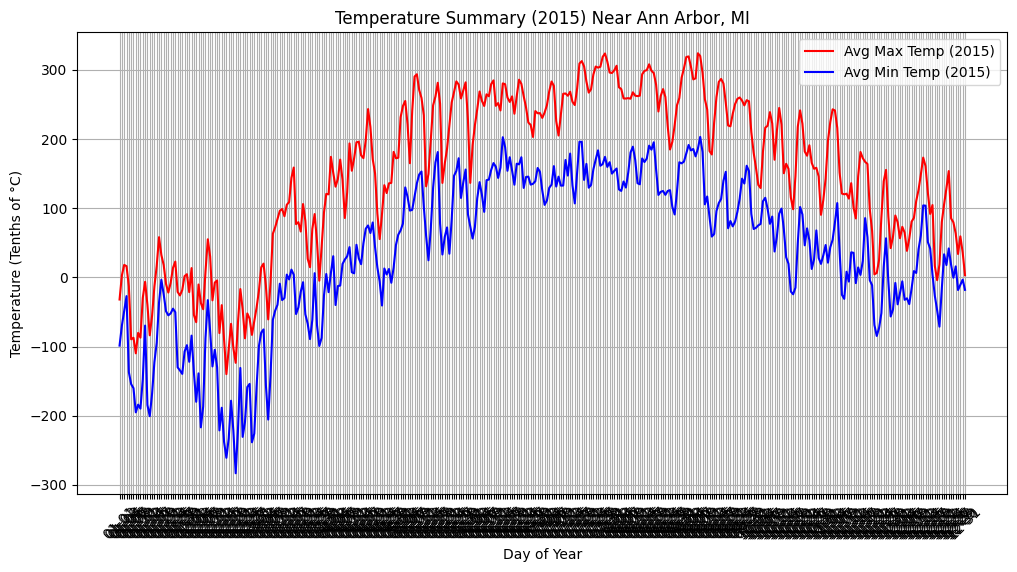

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import folium

# Loading data from csv file
temp_df = pd.read_csv("temperature.csv")
binsize_df = pd.read_csv("BinSize.csv")

temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df["Year"] = temp_df["Date"].dt.year
temp_df["DayOfYear"] = temp_df["Date"].dt.strftime("%m-%d")

# Remove leap day (February 29)
temp_df = temp_df[temp_df["DayOfYear"] != "02-29"]

# Historical and 2015 Data
historical_df = temp_df[(temp_df["Year"] >= 2005) & (temp_df["Year"] <= 2014)]
data_2015_df = temp_df[temp_df["Year"] == 2015]

record_highs = historical_df[historical_df["Element"] == "TMAX"].groupby("DayOfYear")["Data_Value"].max()
record_lows = historical_df[historical_df["Element"] == "TMIN"].groupby("DayOfYear")["Data_Value"].min()

highs_2015 = data_2015_df[data_2015_df["Element"] == "TMAX"].groupby("DayOfYear")["Data_Value"].max()
lows_2015 = data_2015_df[data_2015_df["Element"] == "TMIN"].groupby("DayOfYear")["Data_Value"].min()

record_breaking_highs = highs_2015[highs_2015 > record_highs]
record_breaking_lows = lows_2015[lows_2015 < record_lows]

# Temperature visualization
plt.figure(figsize=(12, 6))
plt.plot(record_highs.index, record_highs.values, color="red", label="Record High (2005-2014)")
plt.plot(record_lows.index, record_lows.values, color="blue", label="Record Low (2005-2014)")
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color="gray", alpha=0.3)
plt.scatter(record_breaking_highs.index, record_breaking_highs.values, color="darkred", label="Record High Broken (2015)", marker="^")
plt.scatter(record_breaking_lows.index, record_breaking_lows.values, color="darkblue", label="Record Low Broken (2015)", marker="v")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (Tenths of °C)")
plt.title("Record High and Low Temperatures (2005-2014) with 2015 Breakers")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Map visualization
ann_arbor_stations = binsize_df[(binsize_df["LATITUDE"].between(41, 43)) & (binsize_df["LONGITUDE"].between(-85, -82))]
map_ann_arbor = folium.Map(location=[42.28, -83.74], zoom_start=8)
for _, row in ann_arbor_stations.iterrows():
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=row["NAME"],
        tooltip=row["NAME"],
    ).add_to(map_ann_arbor)
map_ann_arbor

# 2015 Temperature summary
summary_2015 = data_2015_df.groupby(["DayOfYear", "Element"])["Data_Value"].mean().unstack()
plt.figure(figsize=(12, 6))
sn.lineplot(data=summary_2015, x=summary_2015.index, y="TMAX", label="Avg Max Temp (2015)", color="red")
sn.lineplot(data=summary_2015, x=summary_2015.index, y="TMIN", label="Avg Min Temp (2015)", color="blue")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (Tenths of °C)")
plt.title("Temperature Summary (2015) Near Ann Arbor, MI")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()